In [7]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
from IrisFlowerFactory import IrisFlowerFactory
from gaussianmixtrue.GMMClustering import GMMClustering
from Visualizer import Visualizer
from DataAnalyzer import DataAnalyzer
from sklearn.datasets import load_iris

----- DataFrame Info ----]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

 [---- DataFrame Descibe ----]
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4

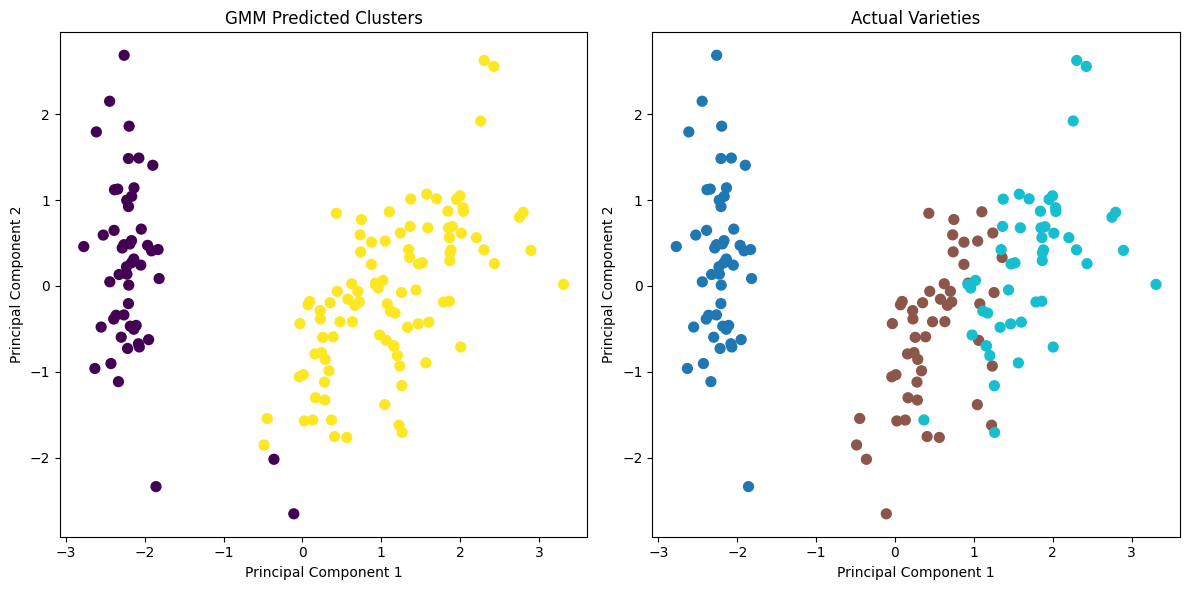

In [9]:
class IrisFlowerMain:
    def __init__(self):
        self.X = None
        self.y_true = None
        self.iris_flowers = []
        self.labels = None
        self.labels_adjusted = None
        self.gmm_clustering = None
        self.accuracy = None
        self.cm = None
        self.visualizer = None
        self.data_analyzer = None

    def load_data(self):
        iris = load_iris()
        self.X = iris.data
        self.y_true = iris.target

        data_analyzer = DataAnalyzer(self.X, self.y_true)
        data_analyzer.create_dataframe(iris)
        data_analyzer.analyze_data()

    def create_iris_flowers(self):
        self.iris_flowers = IrisFlowerFactory().get_iris_flowers()

        for iris_flower in self.iris_flowers:
            print(iris_flower)
            print('-' * 40)

    def perform_clustering(self):
        self.gmm_clustering = GMMClustering()
        self.labels = self.gmm_clustering.fit(self.X)
        self.labels_adjusted = self.gmm_clustering.adjust_labels(self.y_true)
        self.accuracy = self.gmm_clustering.calculate_accuracy(self.y_true)
        self.cm = self.gmm_clustering.get_confusion_matrix(self.y_true)
        print(self.cm)

    def visualize_results(self):
        X_scaled = self.gmm_clustering.get_scaled_data()
        self.visualizer = Visualizer(X_scaled, self.labels_adjusted, self.y_true)
        self.visualizer.reduce_dimensions()
        #self.visualizer.plot_confusion_matrix(self.cm)
        self.visualizer.plot_clusters()

    def run(self):
        self.load_data()
        self.create_iris_flowers()
        self.perform_clustering()
        self.visualize_results()

if __name__ == '__main__':
    app = IrisFlowerMain()
    app.run()


Predicted Cluster의 Accuracy는 67% 